In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [19]:
u1 = np.array([2,5,-3])

In [20]:
u1.shape

(3,)

In [21]:
u2 = np.array([0,-4,6])
u2

array([ 0, -4,  6])

In [22]:
B = np.array([[2, 0, -1], [-2, -3,1], [0,4, -1]])

In [23]:
B

array([[ 2,  0, -1],
       [-2, -3,  1],
       [ 0,  4, -1]])

In [32]:
A = np.vstack((u1, u2))
A

array([[ 2,  5, -3],
       [ 0, -4,  6]])

In [33]:
resp = np.dot(B, u1)
resp

array([  7, -22,  23])

In [34]:
resp = np.multiply(B, u1)
resp

array([[  4,   0,   3],
       [ -4, -15,  -3],
       [  0,  20,   3]])

In [41]:
resp.flatten()

array([ -6, -27,   6,   8,  36, -10])

In [35]:
resp = np.dot(u1, B)
resp

array([ -6, -27,   6])

In [36]:
resp = np.multiply(u1, B)
resp

array([[  4,   0,   3],
       [ -4, -15,  -3],
       [  0,  20,   3]])

In [38]:
resp = np.dot(A, B)
resp

array([[ -6, -27,   6],
       [  8,  36, -10]])

In [44]:
resp = np.dot(B, u2)
resp

array([ -6,  18, -22])

In [47]:
v = np.array([3, 1])
v

array([3, 1])

In [48]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

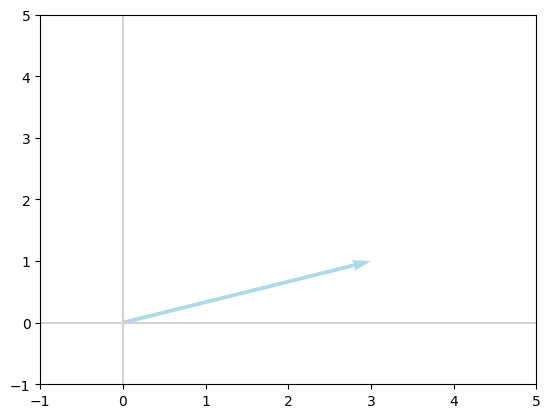

In [49]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [58]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [59]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [60]:
v == Iv

array([ True,  True])

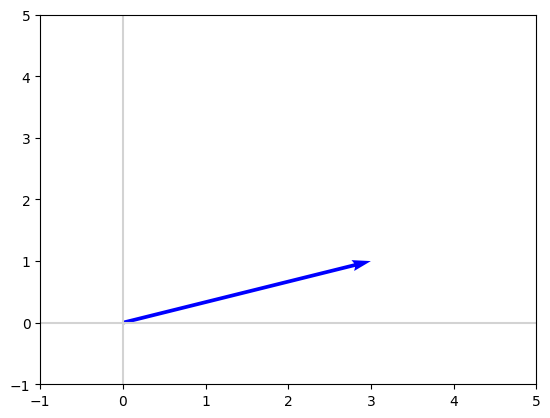

In [61]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [66]:

E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [67]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

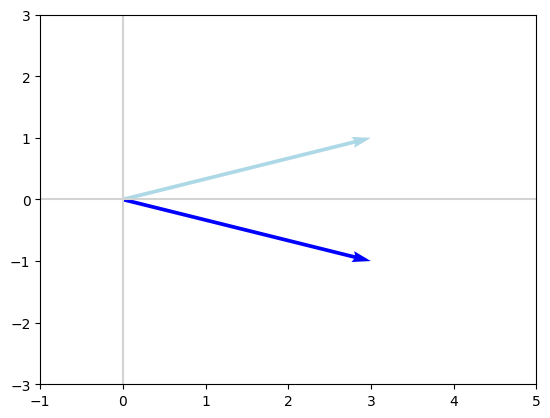

In [68]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

In [69]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [70]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

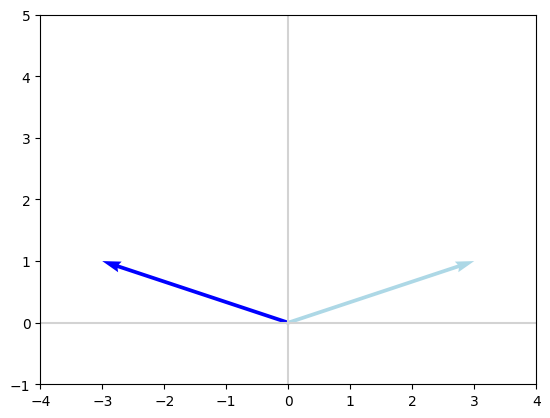

In [71]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

In [72]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [73]:
Av = np.dot(A, v)
Av

array([1, 4])

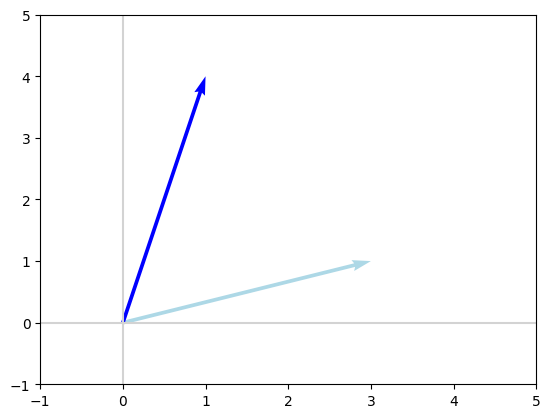

In [74]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

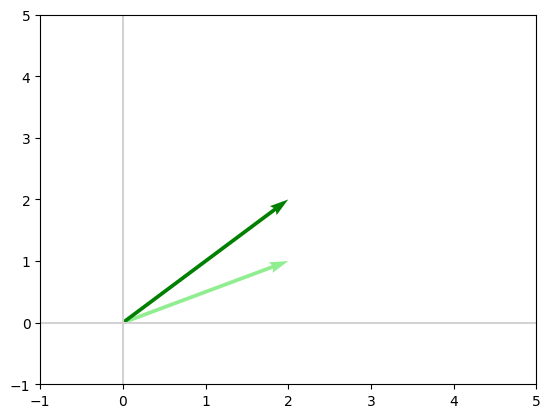

In [75]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [76]:
v

array([3, 1])

In [77]:
np.matrix(v).T

matrix([[3],
        [1]])

In [78]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [79]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [81]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [82]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [83]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [84]:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [85]:
vectorfy(V, 0)

array([3, 1])

In [86]:
vectorfy(V, 0) == v

array([ True,  True])

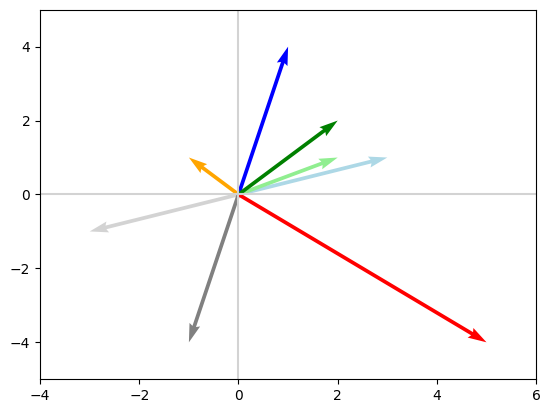

In [87]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)